In [260]:
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import networkx as nx
import time
import pandas as pd
import statsmodels.api as sm

The network I used is an undirected network of cities of the world connected by "sister city" or "twin city" relationships, obtained from here:
http://konect.cc/networks/twin/

In [261]:
path_file = 'twin.txt'
edge_list = pd.read_csv(path_file, delimiter = '\t', names = ['source', 'target'])
edge_list[:10]

,source,target
0,1,10
1,1,11
2,1,12
3,1,13
4,1,14
5,1,15
6,1,16
7,1,17
8,1,18
9,1,19


In [291]:
G = nx.Graph()
G = nx.read_edgelist(path_file)
degree_sequence_nx=[d for n,d in G.degree()]

In [311]:
np.sum(degree_sequence_nx) - 2*G.number_of_edges()
degrees = G.degree
degrees = list(dict(degrees).values())

The PDF and CDF of the degrees of the nodes are:

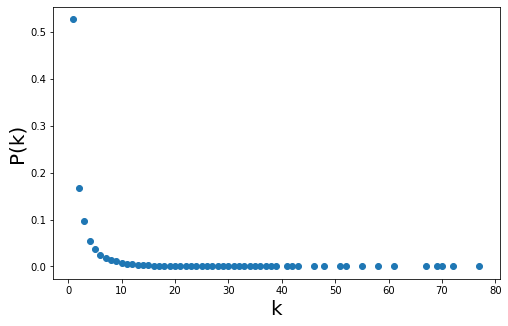

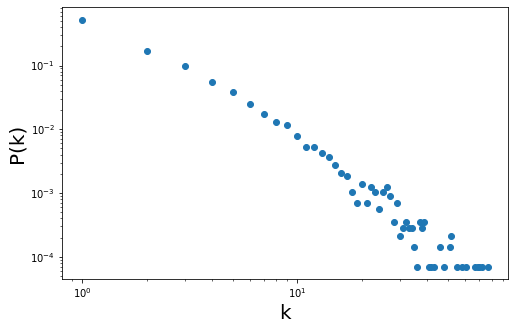

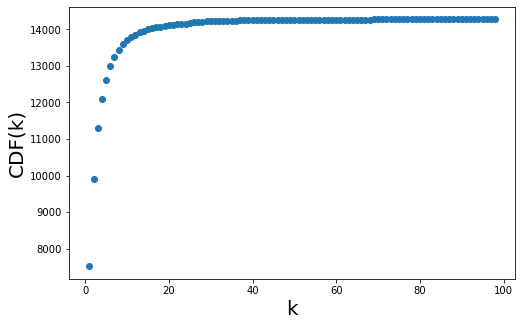

In [317]:
bins=np.arange(0.5,max(np.unique(degrees)),1)
counts_nx, bins=np.histogram(degree_sequence_nx,bins=bins)

x=(bins[1:]-bins[:-1])/2 +bins[:-1]

plt.figure(figsize=(8,5))
plt.plot(x[counts_nx!=0],counts_nx[counts_nx!=0]/sum(counts_nx[counts_nx!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)
plt.show()

plt.figure(figsize=(8,5))
plt.loglog(x[counts_nx!=0],counts_nx[counts_nx!=0]/sum(counts_nx[counts_nx!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)
plt.show()


cfd_emp = np.cumsum(counts_nx)

plt.figure(figsize=(8,5))
plt.plot(x,cfd_emp,'o')
plt.ylabel('CDF(k)', fontsize=20)
plt.xlabel('k',fontsize=20)
plt.show()

We see that the distribution seems to follow a power law. The k_min and, alpha, and KS stats for the fit are as follows:

In [266]:
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
alpha=fit.alpha
print('scaling expoenent:',alpha)
k_min=fit.xmin
print('k_min:',k_min)
##find D for empirical data
CDF_fit = fit.cdf();
CDF_emp = sm.distributions.ECDF(degree_sequence_nx)
KS_emp = np.max(np.abs(CDF_emp(CDF_fit[0]) - CDF_fit[1]))
print('KS stat for empirical data:', KS_emp)

scaling expoenent: 2.8950429600716188
k_min: 8.0
KS stat for empirical data: 0.9405912848535799


Calculating best minimal value for power law fit
C:\Users\Mostafa\Downloads\WPy64-3850\python-3.8.5.amd64\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
C:\Users\Mostafa\Downloads\WPy64-3850\python-3.8.5.amd64\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


Next we generate random samples with the same statistics (simulated data) and fit a power-law to them again. We first plot an example of the CDFs of the fitted and simulated data:

KS:  0.7607


Calculating best minimal value for power law fit


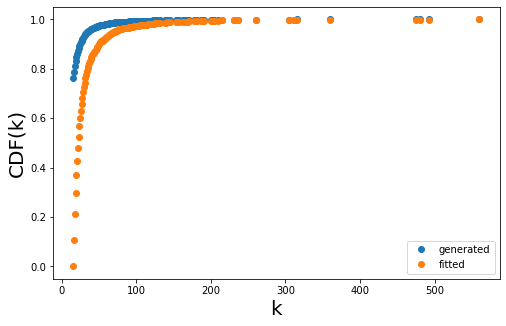

In [267]:
simulated_data = fit.power_law.generate_random(10000);
fit2 = powerlaw.Fit(simulated_data);

CDF_fit2 = fit2.cdf();
CDF_sim = sm.distributions.ECDF(simulated_data);

MaxDiff = np.max(np.abs(CDF_sim(CDF_fit2[0]) - CDF_fit2[1]));
print('KS: ', MaxDiff)

plt.figure(figsize=(8,5))
x = CDF_fit2[0];
plt.plot(x,CDF_sim(x),'o', label = 'generated')
plt.plot(x,CDF_fit2[1],'o', label='fitted')
plt.ylabel('CDF(k)', fontsize=20)
plt.xlabel('k',fontsize=20)
plt.legend()
plt.show()

Next we run this for 1000 times and calculate the p-value for the KS statistics we found for the original fit to our network dataset:

In [242]:
KS = []
for idx in range(1000):
    simulated_data = fit.power_law.generate_random(10000);
    ###theoretical_distribution = powerlaw.Power_Law(xmin=5.0, parameters=[2.5])
    ###simulated_data = theoretical_distribution.generate_random(10000)
    fit2 = powerlaw.Fit(simulated_data);
    #fit2.power_law.xmin, fit2.power_law.alpha
    CDF_fit2 = fit2.cdf();
    CDF_sim = sm.distributions.ECDF(simulated_data);
    KS_sim = np.max(np.abs(CDF_sim(CDF_fit2[0]) - CDF_fit2[1]));
    KS.append(KS_sim)
    #print('KS stat for simulated data:', KS_sim)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [243]:
num = 0
for idx,v in enumerate(KS):
    if KS_emp < v:
        num += 1
        
    
p_value = num/len(KS)
print('p_value:', p_value)

p_value: 0.075


This p-value is quite small and supports our original hypothesis of a power law distribution.